# Esercitazione 2

## 2.1: Integrali

In questa sezione vogliamo calcolare con tecniche MonteCarlo l'integrale
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$. Utilizziamo il metodo della media: stimeremo che 
$$I\approx\frac{b-a}{N}\sum_{i=1}^Nf(x_i)$$, dove $a$ e $b$ sono gli estremi di integrazione, ${x_i}$ sono campioni estratti da una certa distribuzione di probabilità ed $N$ è il numero di campioni.
Lo scopo dell'esercizio è evidenziare il miglioramento che possono apportare le tecniche di importance sampling in un calcolo di questo tipo.

In tutti i casi abbiamo valutato la funzione integranda in $10^4$ punti e diviso i risultati in $10^2$ blocchi.

Per prima cosa, estraiamo i campioni da una distribuzione di probabilità uniforme:

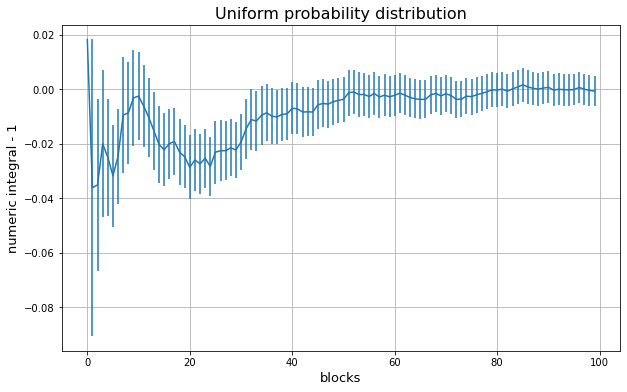

final estimate: 0.999294 ± 0.0055878


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

y, err = np.loadtxt('data/UnifInt.dat', usecols=(0,1), delimiter=' ', unpack=True)
x      = np.arange(y.size)

plt.figure(figsize=(10,6))
plt.errorbar(x,y-1,err)
plt.grid(True)
plt.xlabel('blocks',fontsize=13)
plt.ylabel('numeric integral - 1',fontsize=13)
plt.title("Uniform probability distribution",fontsize=16)

plt.show()

print('final estimate:',y[y.size-1],'±',err[err.size-1])

Utilizziamo ora invece l'importance sampling: consideriamo la distribuzione di probabilità
$$p(x)=2(1-x)$$
Questa funzione approssima il comportamento dell'integranda nel dominio considerato (si veda la figura sotto). Ci si aspetta quindi che la precisione che si ottiene con questo metodo sia maggiore. Un altro vantaggio è che l'inversa della cumulativa è $F^{-1}(x)=1-\sqrt{1-x}$: essendo nota, la distribuzione è facile da campionare.

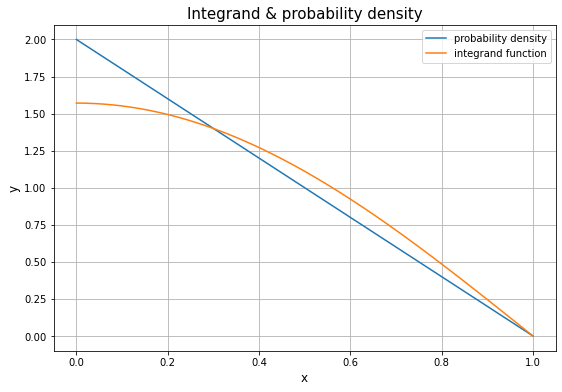

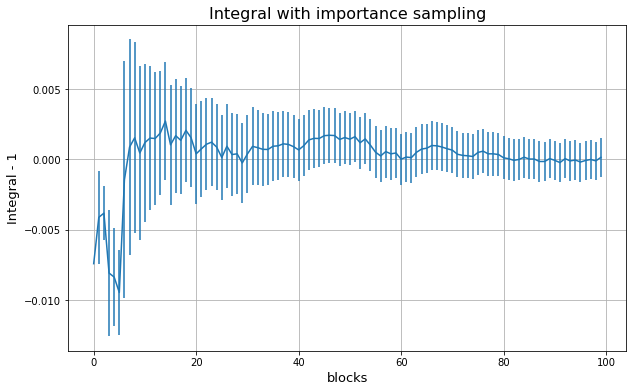

final estimate: 1.00015 ± 0.00136235


In [2]:
import math

def f(x):
    return math.pi/2.*np.cos(math.pi*x/2.)

xf = np.linspace(0,1,100)
yp = 2*(1-xf)
yf = f(xf)

plt.figure(figsize=(9,6))
plt.title('Integrand & probability density',fontsize=15)
plt.plot(xf,yp,label='probability density')
plt.plot(xf,yf,label='integrand function')
plt.xlabel('x',fontsize=12)
plt.ylabel('y',fontsize=12)
plt.grid(True)
plt.legend()

y, err = np.loadtxt('data/ImpInt.dat', usecols=(0,1), delimiter=' ', unpack=True)
x      = np.arange(y.size)

plt.figure(figsize=(10,6))
plt.errorbar(x,y-1,err)
plt.grid(True)
plt.xlabel('blocks',fontsize=13)
plt.ylabel('Integral - 1',fontsize=13)
plt.title("Integral with importance sampling",fontsize=16)

plt.show()
print('final estimate:',y[y.size-1],'±',err[err.size-1])

L'importance sampling si è dimostrato efficace: abbiamo ottenuto che $\sigma_{unif}\approx5\sigma_{ImpSampl}$.

## 2.2: Random Walks
Ci occupiamo ora di simulare dei Random Walks, ovvero le traiettorie di punti che ad ogni passo si muovono di un certo valore fissato $a$ in uno spazio (nel nostro caso) tridimensionale in una direzione casuale. Consideriamo due possibilità:
- **RW discreti**: ad ogni iterazione il punto si muove su di un reticolo cubico discreto di passo $a$. I movimenti possibili sono quindi spostarsi di $a$ avanti o indietro lungo uno degli assi del sistema.
- **RW continui**: ad ogni iterazione il punto si muove di una lunghezza $a$ in una direzione qualsiasi.

Lo scopo della simulazione è produrre i dati relativi a $\sqrt{\langle|\vec{r}|^2\rangle}$ e calcolarne l'incertezza in funzione dei passi del random walk. Abbiamo generato $10^4$ random walk di $10^2$ passi ciascuno, e ottenuto le incertezze tramite data blocking. Abbiamo inoltre eseguito un fit di $\sqrt{\langle|\vec{r}|^2\rangle}$ con una funzione del tipo $f=k\sqrt{x}$. I risultati sono mostrati in figura.

 --- Random Walk over a discrete lattice --- 
fit with k*sqrt(x): k =  [1.00108903]
confidence over k : +-  [[0.00025261]]
 --- Random Walk in a continuum space --- 
fit with k*sqrt(x): k = [1.00272948]
confidence over k : +- [[0.00034733]]


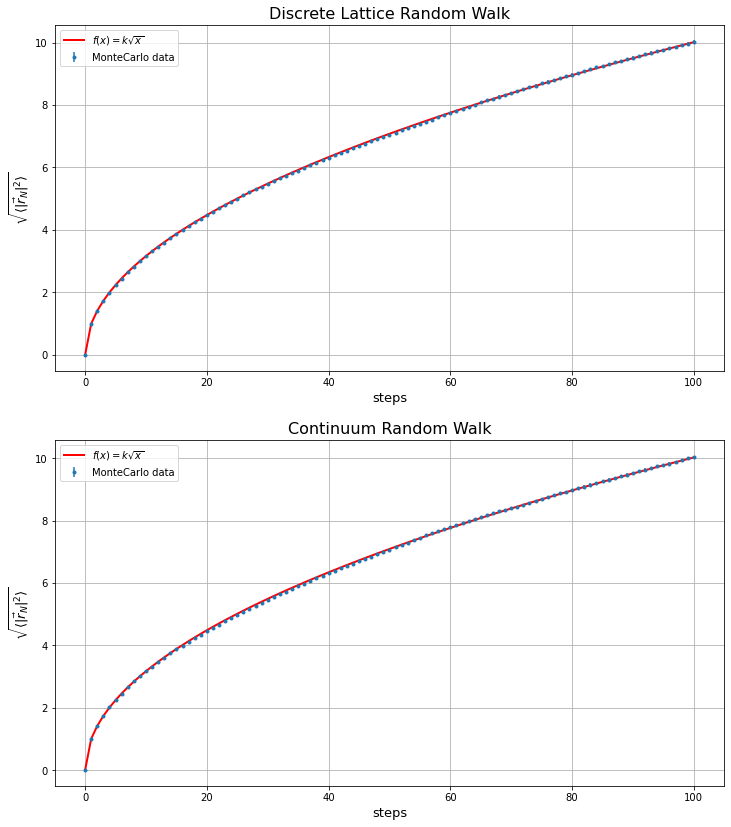

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def f (x,k):
    return k*(x**0.5)

#loading and fitting data
yD, errD = np.loadtxt("data/discreteRW.dat", usecols=(0,1), delimiter=' ', unpack=True)
x      = np.arange(yD.size)

yC,errC = np.loadtxt("data/continuousRW.dat", usecols=(0,1), delimiter=' ', unpack=True)

#discrete fit
p_opt_disc, p_cov_disc = curve_fit(f, x, yD)
y_fit = f(x,p_opt_disc[0])

print( ' --- Random Walk over a discrete lattice --- ')
print('fit with k*sqrt(x): k = ',p_opt_disc)
print('confidence over k : +- ',np.sqrt(p_cov_disc))

#continuous fit
p_opt_cont, p_cov_cont = curve_fit(f, x, yC)

print( ' --- Random Walk in a continuum space --- ')
print('fit with k*sqrt(x): k = '+str(p_opt_cont))
print('confidence over k : +- '+str(np.sqrt(p_cov_cont)))

#graphing
plt.figure(figsize=(12,14))

plt.subplot(211)
plt.errorbar(x,yD,errD,fmt='.',label='MonteCarlo data')
plt.grid(True)
plt.xlabel('steps',fontsize=13)
plt.ylabel(r'$\sqrt{\langle|\vec{r}_{N}|^2\rangle}$',fontsize=13)
plt.title("Discrete Lattice Random Walk",fontsize=16)
y_fitD = f(x,p_opt_disc)
plt.plot(x,y_fitD,'r',linewidth=2,label='$f(x)=k\sqrt{x}$') # plotting fitted function
plt.legend()

plt.subplot(212)
plt.errorbar(x,yC,errC,fmt='.',label='MonteCarlo data')
plt.grid(True)
plt.xlabel('steps',fontsize=13)
plt.ylabel(r'$\sqrt{\langle|\vec{r}_{N}|^2\rangle}$',fontsize=13)
plt.title("Continuum Random Walk",fontsize=16)
y_fitC = f(x,p_opt_cont)
plt.plot(x,y_fitC,'r',linewidth=2,label='$f(x)=k\sqrt{x}$') # plotting fitted function
plt.legend()

plt.show()


### Analisi compatibilità

Un'analisi della compatibilità dei risultati può essere ottenuta confrontando la differenza tra le due curve e considerando gli errori punto per punto.

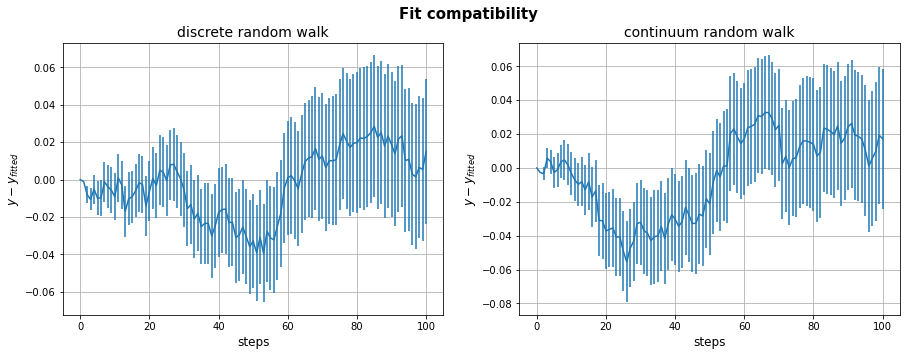

In [4]:
#graph
plt.figure(figsize=(15,5))
plt.suptitle('Fit compatibility',fontweight="bold",fontsize=15)

plt.subplot(121)
plt.errorbar(x,yD-y_fitD,errD)
plt.xlabel('steps',fontsize=12)
plt.ylabel('$y-y_{fitted}$',fontsize=12)
plt.title('discrete random walk',fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.errorbar(x,yC-y_fitC,errC)
plt.xlabel('steps',fontsize=12)
plt.ylabel('$y-y_{fitted}$',fontsize=12)
plt.title('continuum random walk',fontsize=14)
plt.grid(True)


Buona parte delle coppie di valori sono a meno di $\sigma$ di distanza. Si evidenzia quindi una buona compatibilità dei dati con il fit.